# Home Credit Default Risk Competition Analysis

In this notebook, we will take an initial look at the Home Credit default risk machine learning competition currently hosted on Kaggle. The objective of this competition is to use historical loan application data to predict whether or not an applicant will be able to repay a loan. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read data
train = pd.read_csv('./home_credit/application_train.csv')
print(train.shape)

(307511, 122)


In [3]:
test = pd.read_csv('./home_credit/application_test.csv')
print(test.shape)

(48744, 121)


In [4]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## EDA

In [5]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

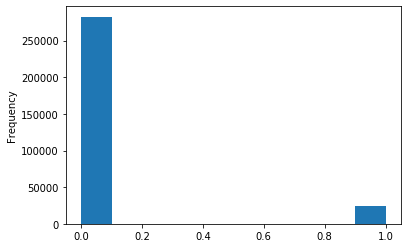

In [6]:
train['TARGET'].astype(int).plot.hist();

In [7]:
# examine missing values
def missing_values(df):
    # total missing values
    mis_val = df.isnull().sum()
    
    # percent of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # make a table with results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # rename the column
    mis_val_name = mis_val_table.rename(columns= {0: 'Missing Values', 1: '% of Total Values'})
    
    # sort the table(percent of missing(descending))
    mis_val_name = mis_val_name[mis_val_name.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    
#        # Print some summary information
#         print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
#             "There are " + str(mis_val_table_ren_columns.shape[0]) +
#               " columns that have missing values.")
    # print summary
    print('Selected dataframe has ' + str(df.shape[1]) + ' columns.\n' 
          'There are ' + str(mis_val_name.shape[0]) + ' columns that have missing values.')
    
    return mis_val_name

In [8]:
missing_value = missing_values(train)
missing_value.head(20)

Selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [9]:
# types of columns
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [10]:
# number of unique classes in each column
train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Label Encoding and One-hot Encoding

In [11]:
encoder = LabelEncoder()
le_count = 0

for col in train:
    if train[col].dtype == 'object':
        if len(list(train[col].unique())) <= 2:
            encoder.fit(train[col])
            train[col] = encoder.transform(train[col])
            test[col] = encoder.transform(test[col])
            
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [13]:
# one-hot encoding

train = pd.get_dummies(train)
test = pd.get_dummies(test)

print('Training Features Shape: ',train.shape)
print('Testing Features Shape: ',test.shape)

Training Features Shape:  (307511, 243)
Testing Features Shape:  (48744, 239)


In [14]:
# align training and testing data
train_labels = train['TARGET']

train, test = train.align(test, join='inner', axis=1)

train['TARGET'] = train_labels

print('Training Features Shape: ', train.shape)
print('Testing Features Shape: ', test.shape)

Training Features Shape:  (307511, 240)
Testing Features Shape:  (48744, 239)


### Anamolies

In [15]:
(train['DAYS_BIRTH']).describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [16]:
(train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [18]:
(train['DAYS_EMPLOYED']).describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

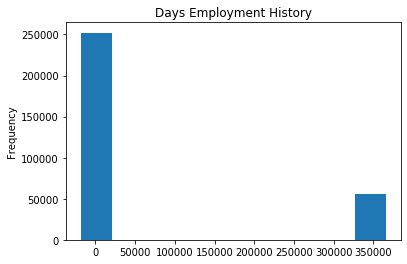

In [19]:
train['DAYS_EMPLOYED'].plot.hist(title='Days Employment History');

Let's subset the anomalous clients and see if they tend to have higher or low rates of default than the rest of the clients.

In [20]:
anom = train[train['DAYS_EMPLOYED'] == 365243]
non_anom = train[train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Handling the anomalies depends on the exact situation, with no set rules. One of the safest approaches is just to set the anomalies to a missing value and then have them filled in (using Imputation) before machine learning. In this case, since all the anomalies have the exact same value, we want to fill them in with the same value in case all of these loans share something in common. The anomalous values seem to have some importance, so we want to tell the machine learning model if we did in fact fill in these values. As a solution, we will fill in the anomalous values with not a number (np.nan) and then create a new boolean column indicating whether or not the value was anomalous.

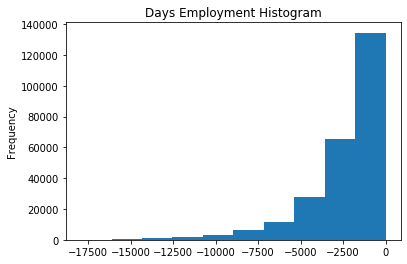

In [21]:
train['DAYS_EMPLOYED_ANOM'] = train['DAYS_EMPLOYED'] == 365243

train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

train['DAYS_EMPLOYED'].plot.hist(title='Days Employment Histogram');

In [22]:
test['DAYS_EMPLOYED_ANOM'] = test['DAYS_EMPLOYED'] == 365243
test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

### Correlations

In [23]:
corr = train.corr()['TARGET'].sort_values()

print('\nMost Positive Correlations: ', corr.tail(15))
print('\n Most Negative Correlations: ', corr.head(15))


Most Positive Correlations:  OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

 Most Nega

Let's take a look at some of more significant correlations: the DAYS_BIRTH is the most positive correlation. (except for TARGET because the correlation of a variable with itself is always 1!) Looking at the documentation, DAYS_BIRTH is the age in days of the client at the time of the loan in negative days (for whatever reason!). The correlation is positive, but the value of this feature is actually negative, meaning that as the client gets older, they are less likely to default on their loan (ie the target == 0). That's a little confusing, so we will take the absolute value of the feature and then the correlation will be negative.

In [24]:
# effect of age on repayment
train['DAYS_BIRTH'] = abs(train['DAYS_BIRTH'])
train['DAYS_BIRTH'].corr(train['TARGET'])

-0.07823930830982712

As the client gets older, there is a negative linear relationship with the target meaning that as clients get older, they tend to repay their loans on time more often.

Let's start looking at this variable. First, we can make a histogram of the age. We will put the x axis in years to make the plot a little more understandable.


Text(0, 0.5, 'Count')

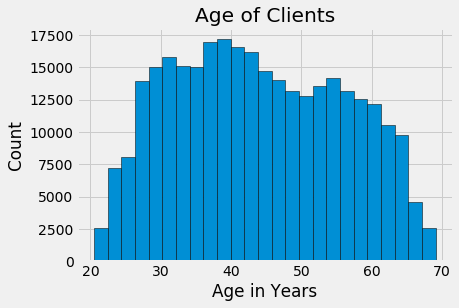

In [25]:
plt.style.use('fivethirtyeight')

plt.hist(train['DAYS_BIRTH'] / 365, edgecolor='k', bins=25)
plt.title('Age of Clients');
plt.xlabel('Age in Years');
plt.ylabel('Count')